<a href="https://colab.research.google.com/github/janet12041/RPAA/blob/main/RPAA_T6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 6.2 Redes neuronales multicapa (fronteras no lineales)

##Janet Illescas Coria

1. Entra en el siguiente enlace https://playground.tensorflow.org/ y configura los hiperparámetros de una red neuronal multicapa para separar las clases del dataset spiral, guarda el enlace y la captura de pantalla de tu entrenamiento y pégalos en un notebook de jupyter.

Enlace: https://playground.tensorflow.org/#activation=relu&batchSize=8&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=20&networkShape=4,5,4&seed=0.62919&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

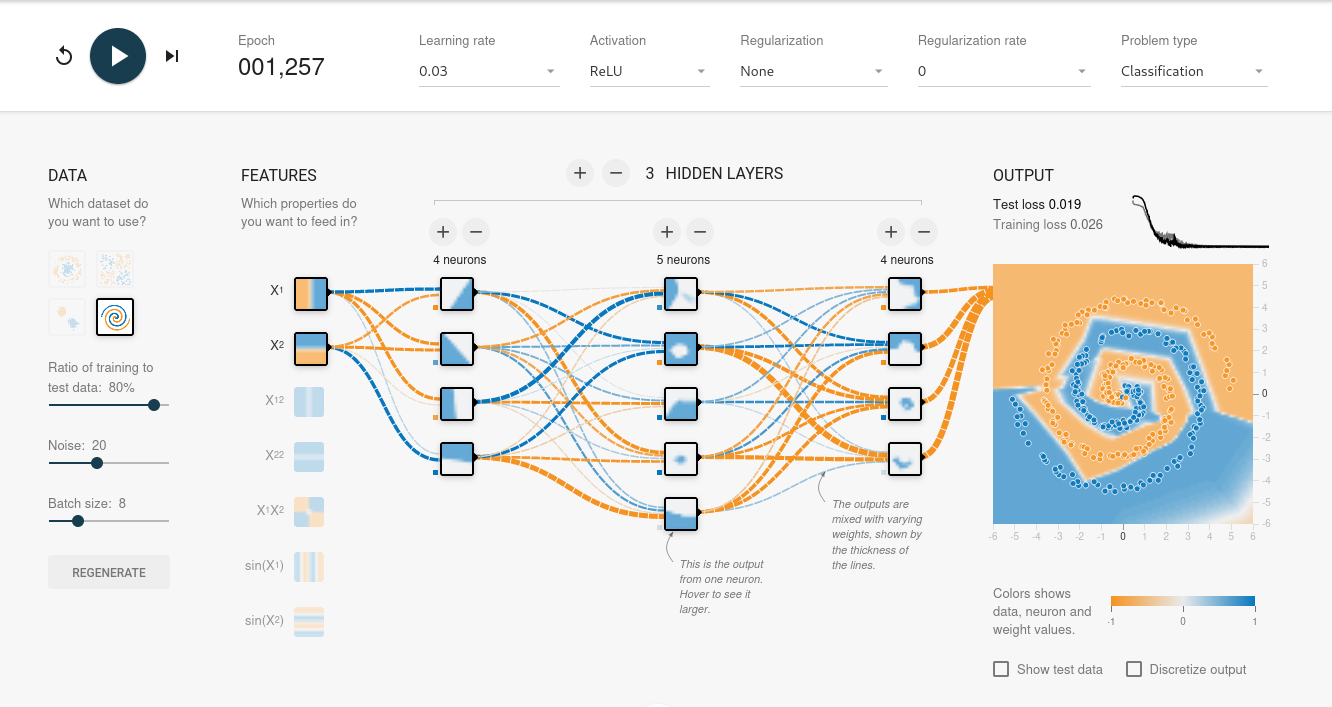

2. **Elabora** el código en python con keras de un modelo de red neuronal para el mismo dataset, en este caso debes generar tus datos. Entrena el modelo con diferentes configuraciones y grafica los puntos del dataset y la frontera de decisión de tu modelo.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_samples, d=1, noise=0.1):
    t = np.linspace(0, d*np.pi, n_samples)
    r1 = np.linspace(0, 1, n_samples) + noise * np.random.randn(n_samples)
    r2 = np.linspace(0, 1, n_samples) + noise * np.random.randn(n_samples)
    x1 = r1 * np.sin(2 * t)
    y1 = r1 * np.cos(2 * t)
    x2 = r2 * np.sin(2 * t + np.pi)
    y2 = r2 * np.cos(2 * t + np.pi)

    X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

    return X, y

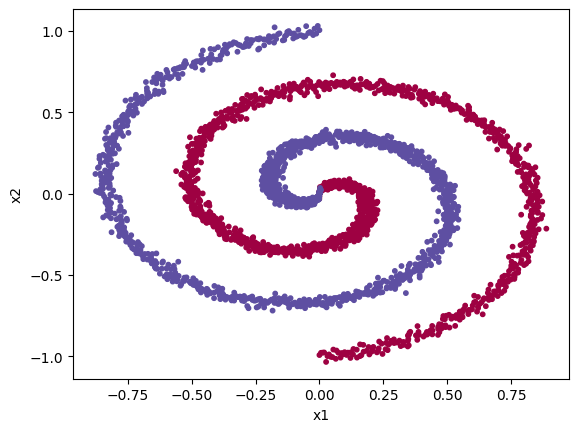

In [4]:
# Generar datos de espirales
X, y = generate_spiral_data(n_samples=1500, d=1.5, noise=0.02)

# Graficar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
def print_loss_accuracy(history):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  accuracy_train = history.history['accuracy']
  accuracy_val = history.history['val_accuracy']
  epochs = range(1, len(loss_train) + 1)

  # Loss
  plt.figure(figsize=(12, 6))
  plt.plot(epochs, loss_train, label='loss')
  plt.plot(epochs, loss_val, label='val_loss')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Accuracy
  plt.figure(figsize=(12, 6))
  plt.plot(epochs, accuracy_train, label='accuracy')
  plt.plot(epochs, accuracy_val, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Frontera de Decisión en el espacio de los datos de entrenamiento
def plot_decision_boundary(moel, X, Y, npts = 50):
    xmin, xmax = X[:, 0].min(), X[:, 0].max()
    ymin, ymax = X[:, 1].min(), X[:, 1].max()
    dx, dy = (xmax - xmin)*0.1, (ymax - ymin)*0.1
    xx, yy = np.meshgrid(np.linspace(xmin-dx, xmax+dx, npts), np.linspace(ymin-dy, ymax+dy, npts))
    data = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(data)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors='k', levels=[-0.1, 0.1])
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral, s=10)
    plt.show()

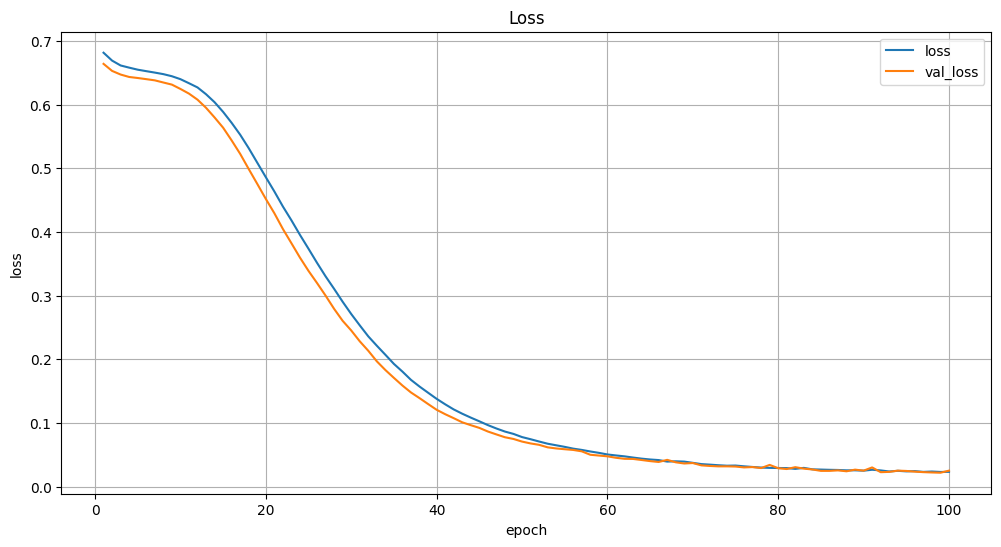

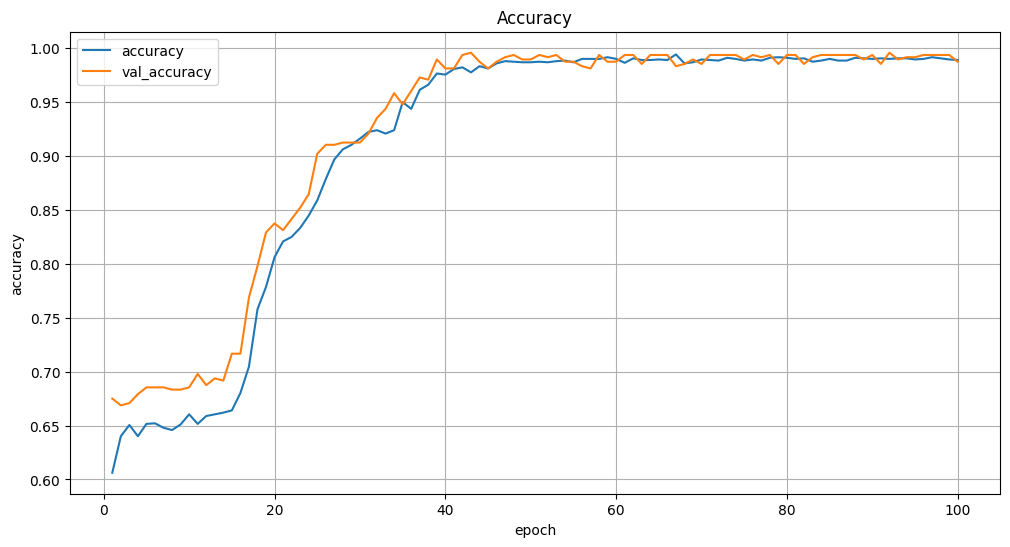

79/79 [==============================] - 0s 2ms/step


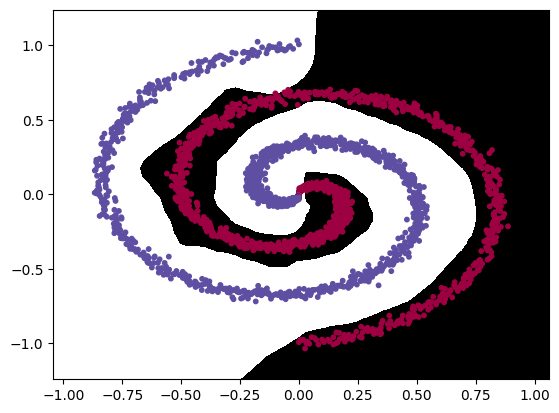

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(30, input_shape=(2,), activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, verbose=0,
                    batch_size=32, validation_split=0.2)

print_loss_accuracy(history)
plot_decision_boundary(lambda x: model, x_train, y_train)

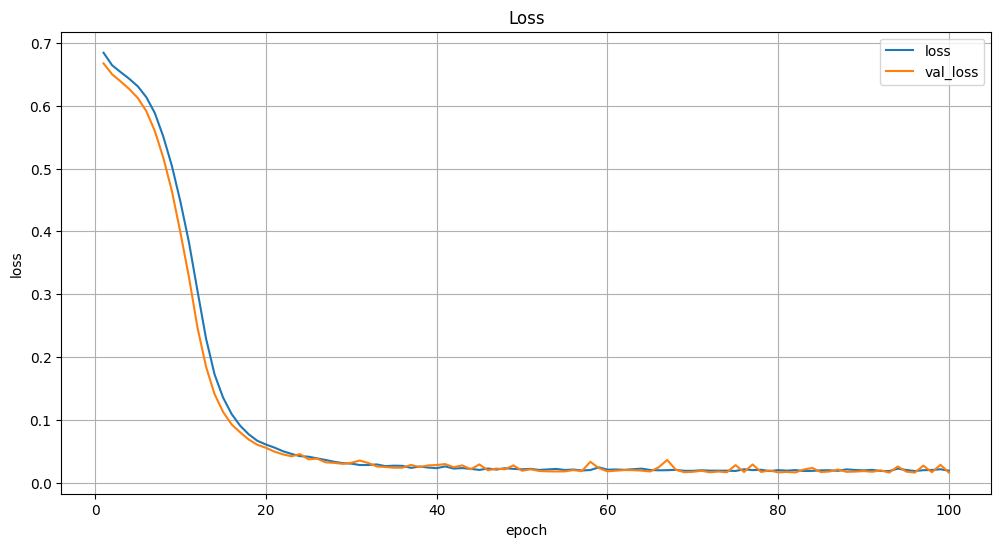

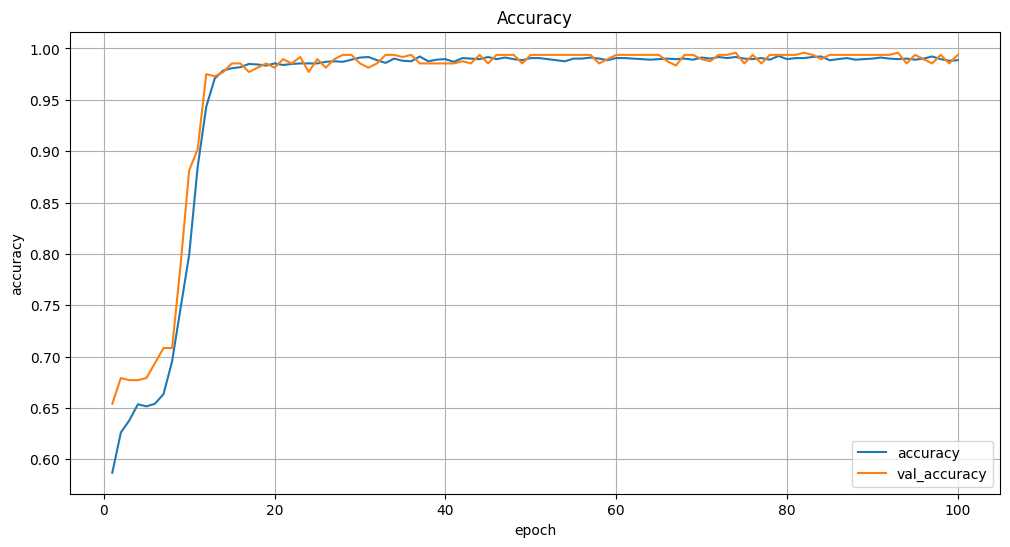

79/79 [==============================] - 0s 2ms/step


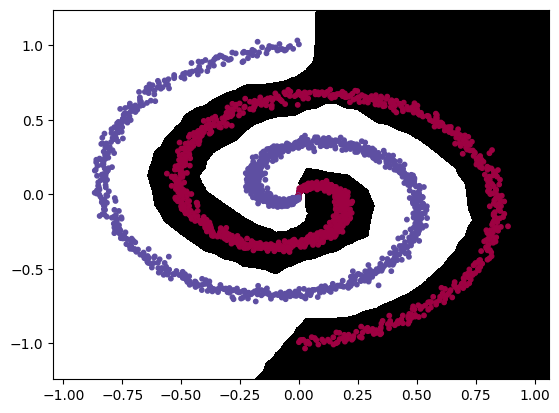

In [30]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(30, input_shape=(2,), activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, verbose=0,
                    batch_size=32, validation_split=0.2)

print_loss_accuracy(history)
plot_decision_boundary(lambda x: model, x_train, y_train)

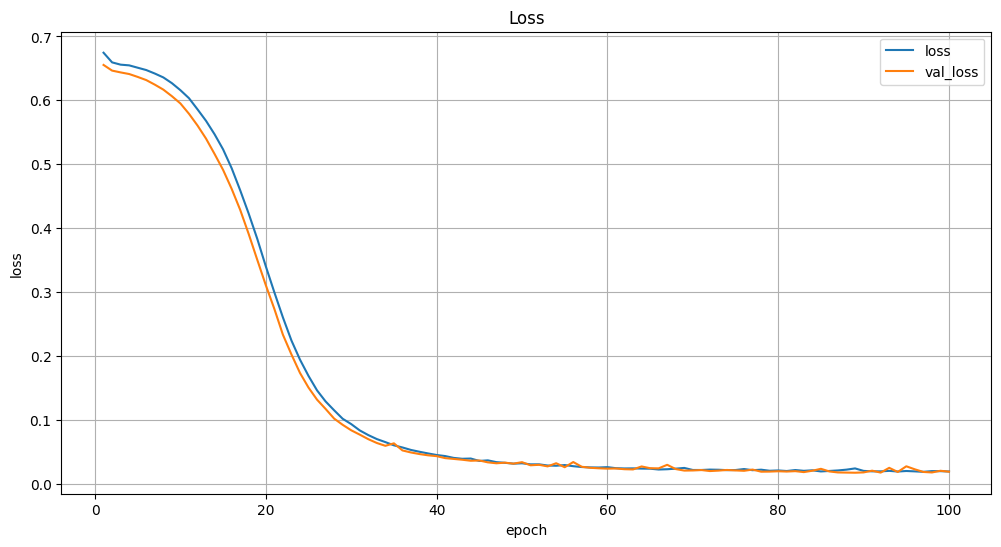

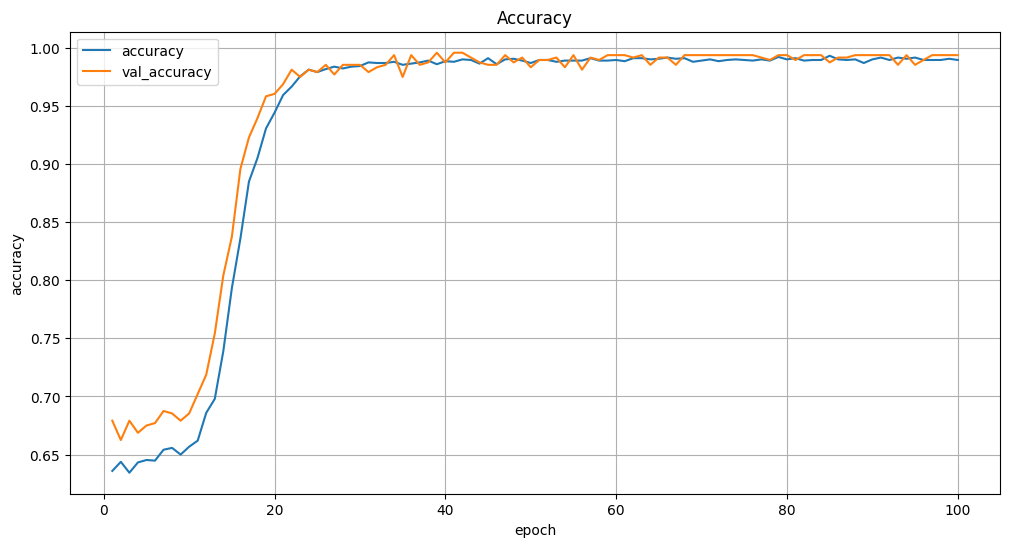

79/79 [==============================] - 0s 2ms/step


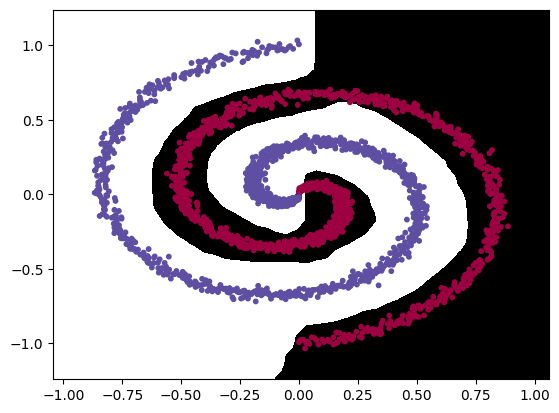

In [32]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(40, input_shape=(2,), activation='relu'),
    Dense(40, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, verbose=0,
                    batch_size=32, validation_split=0.2)

print_loss_accuracy(history)
plot_decision_boundary(lambda x: model, x_train, y_train)

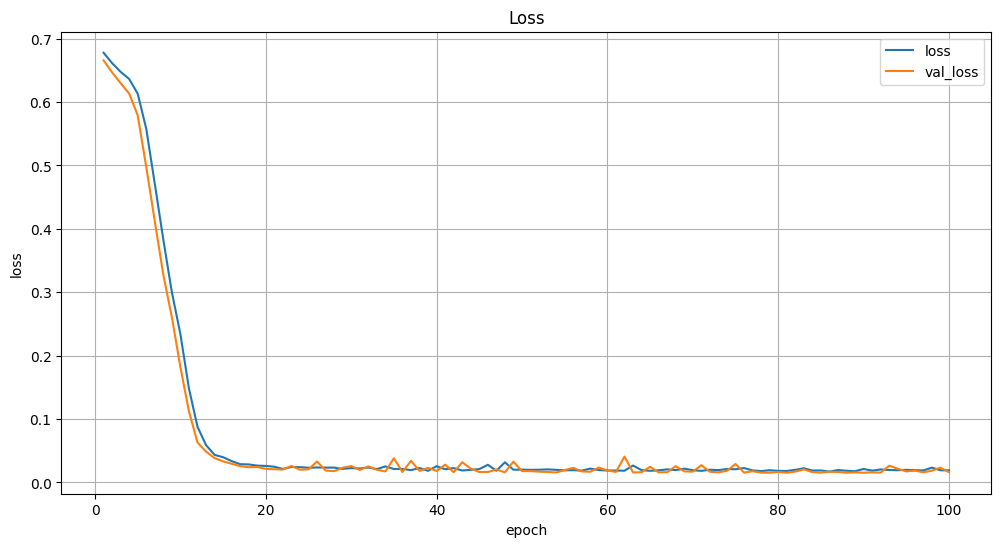

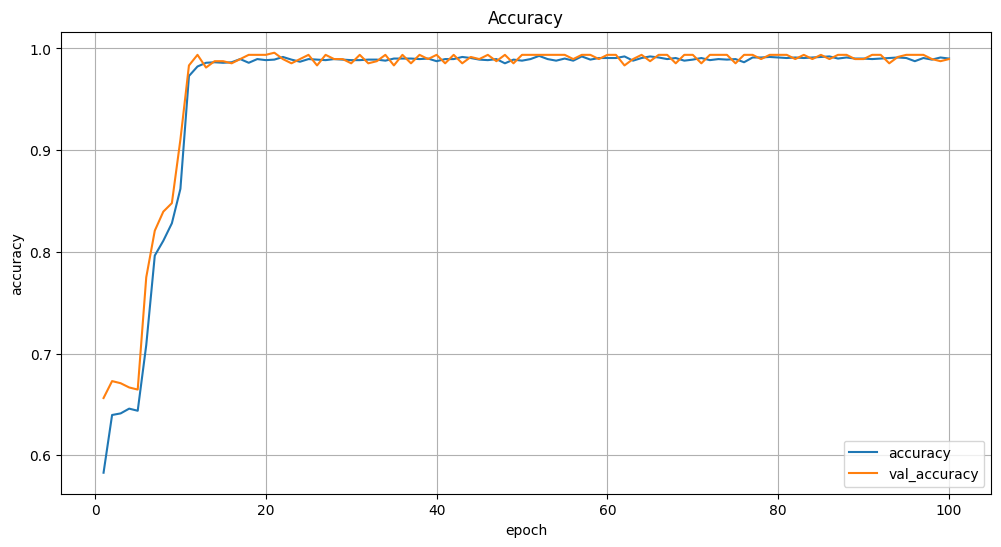

79/79 [==============================] - 0s 2ms/step


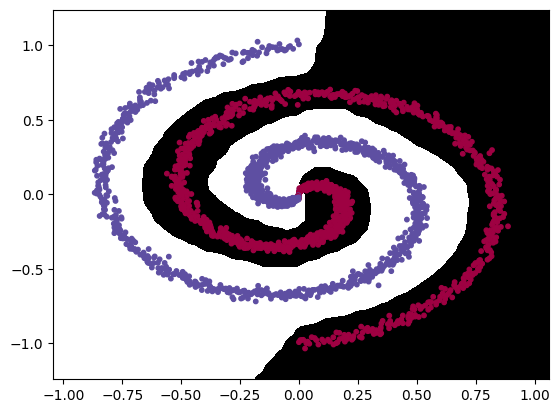

In [29]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(100, input_shape=(2,), activation='relu'),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, verbose=0,
                    batch_size=32, validation_split=0.2)

print_loss_accuracy(history)
plot_decision_boundary(lambda x: model, x_train, y_train)



---



3. (Opcional) Selecciona otro dataset que no sea linealmente separable, y desarrolla los pasos 1 y 2 nuevamente.

Enlace: https://playground.tensorflow.org/#activation=tanh&batchSize=20&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3,1&seed=0.50291&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

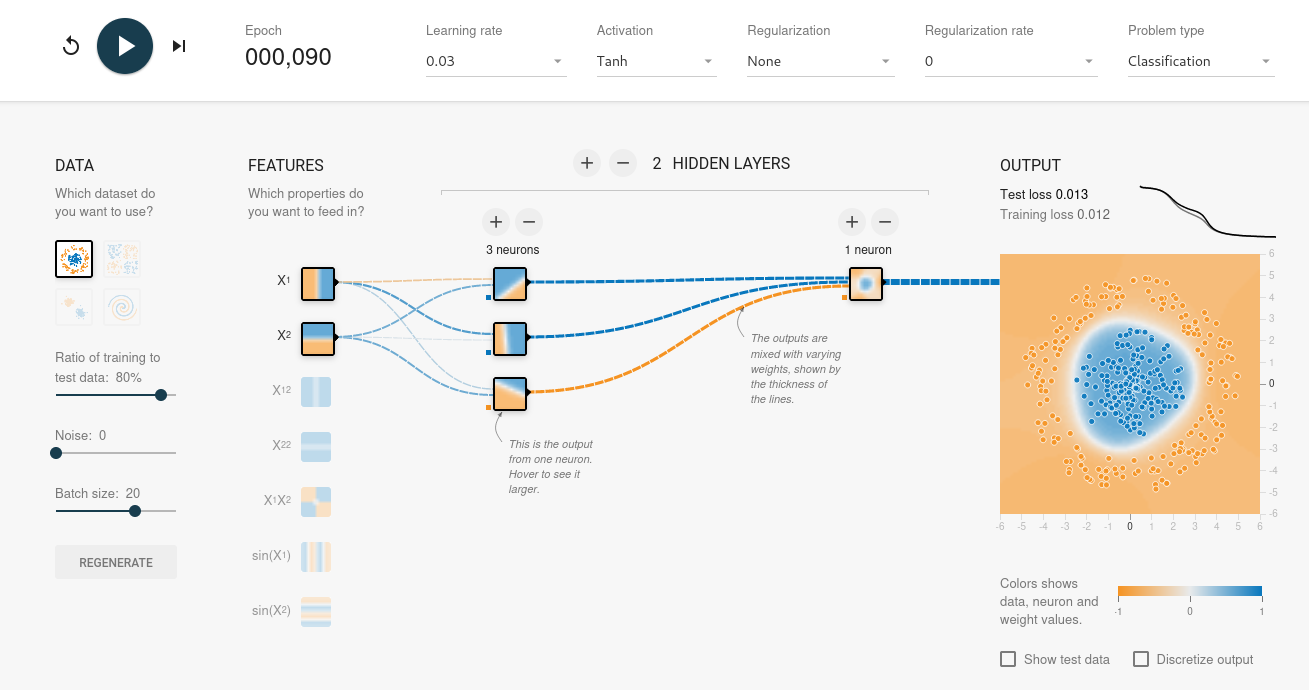